# Задачи нахождения корней нелинейных функций

In [ ]:
import numpy as np 
from scipy import optimize

f = lambda x: np.cos(x) - x
r = optimize.fsolve(f,-2)

r, f(r), 

(array([0.73908513]), array([0.]))

In [3]:
f = lambda x: 1/x
r = optimize.fsolve(f,-2)

r, f(r)

C:\Users\ivant\AppData\Local\Temp\ipykernel_32960\235877773.py:2: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  r = optimize.fsolve(f,-2)


(array([-3.52047359e+83]), array([-2.84052692e-84]))

In [4]:
def bisection(f,a,b,tol):
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("a and b can't provide you with root")
    
    m = (a+b)/2
    
    if np.abs(f(m))<tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return bisection(f,m,b,tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        return bisection(f,a,m,tol)

In [ ]:
f = lambda x: x**2 - 2

r1 = bisection(f,0,3,0.00000001)
r1

1.4142135623842478

## Метод хорд

### Возьмем функцию с несколькими корнями
Например:
$$f(x) = x^3 - 3x^2 + 2$$

Построим ее график:

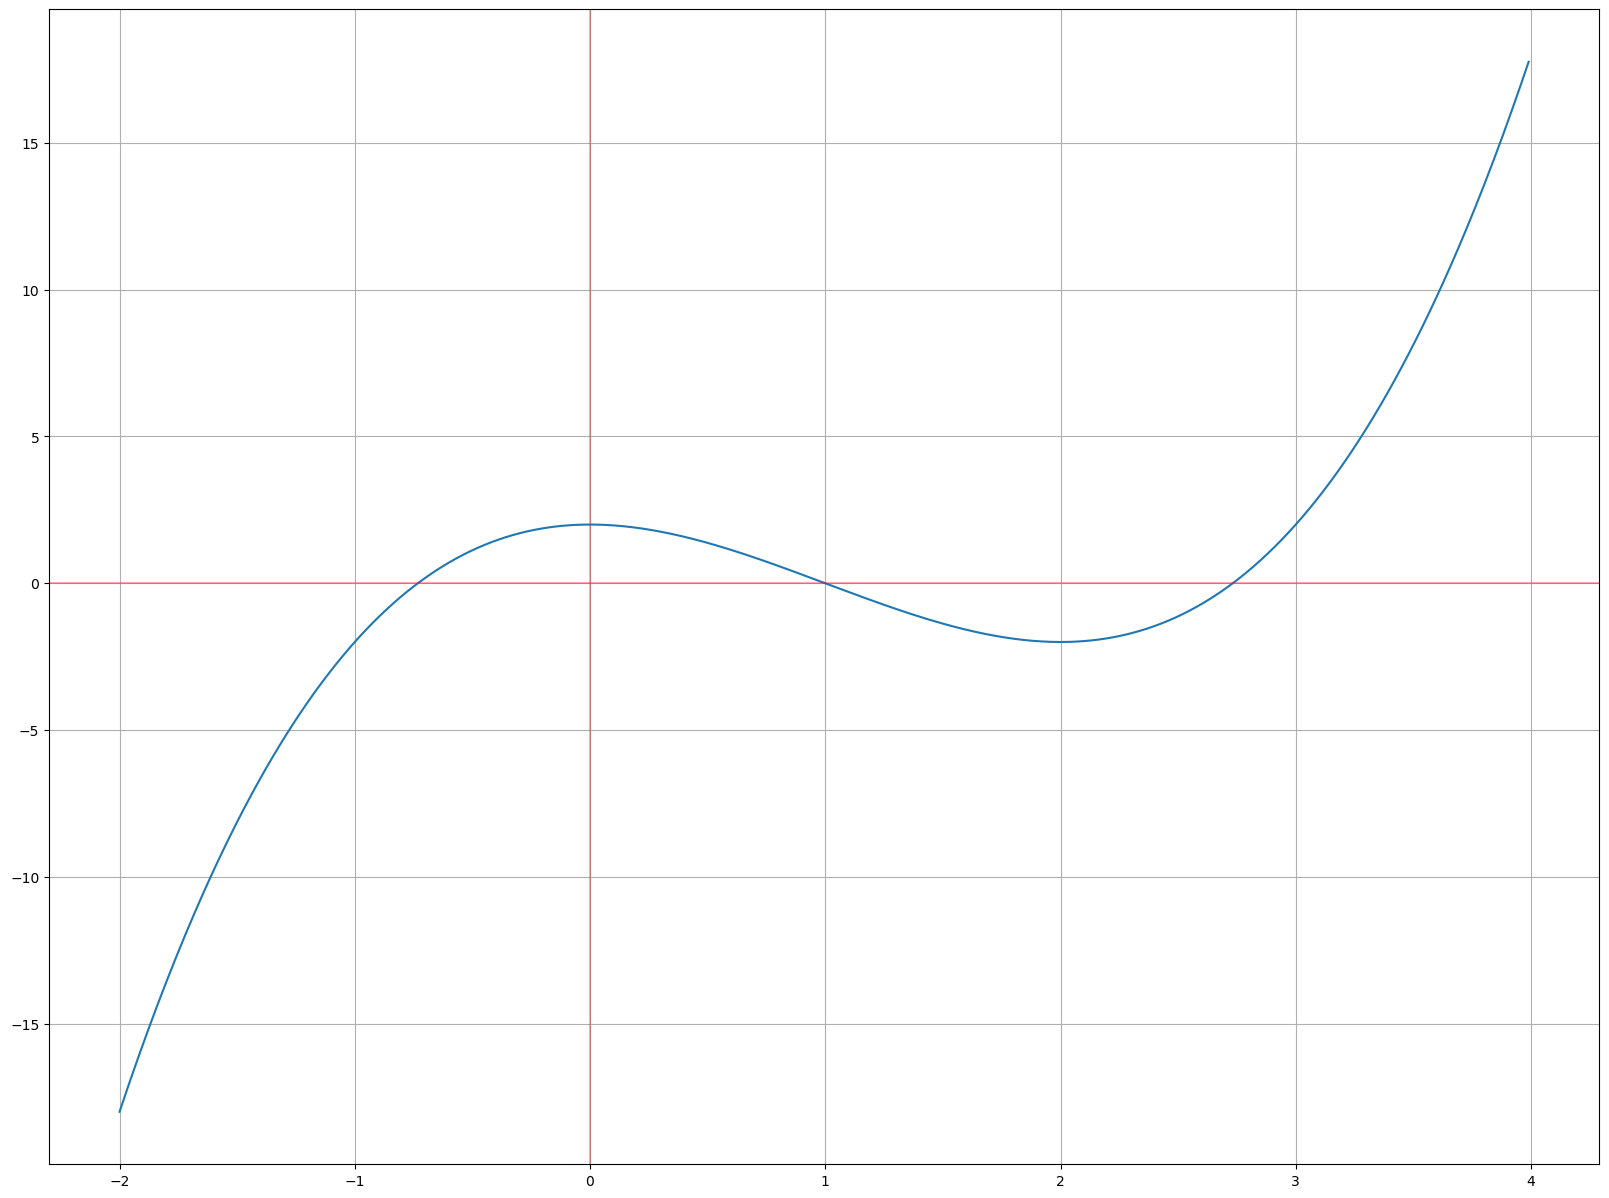

In [ ]:
f = lambda x: x**3 - 3*x**2+ 2 
x = np.arange(-2,4,0.01)
plt.plot(x,np.vectorize(f)(x))
plt.axhline(y=0, color='r',alpha=0.3)
plt.axvline(x=0, color='r',alpha=0.3)
plt.grid()
plt.show()

In [ ]:
# Реализуем рекурсионно алгоритм метода хорд
def chords_method_recursion(f,a,b,tol):
    """
    Реализация метода хорд для решения уравнения f(x) = 0.

    Параметры:
        f: функция, для которой ищется корень.
        a, b: границы начального отрезка [a, b], где f(a) * f(b) < 0.
        tol: требуемая точность (остановка, когда |x_{n+1} - x_n| < tol).

    Возвращает:
        Приближённое значение корня.
    """
    # Проверяем условие существования корня на отрезке [a, b]
    if f(a) * f(b) >= 0:
        raise ValueError("На отрезке [a, b] нет гарантии наличия корня (f(a) * f(b) >= 0).")
    
    x1 = a - (f(a)*(b-a))/(f(b)-f(a))
    
    if np.abs(f(x1))<tol:
        return x1
    else:
        return  chords_method_recursion(f,x1,b,tol)

# Реализуем Итеративно алгоритм метода хорд
def chord_method_iteration(f, a, b, tol):
    """
    Реализация метода хорд для решения уравнения f(x) = 0.

    Параметры:
        f: функция, для которой ищется корень.
        a, b: границы начального отрезка [a, b], где f(a) * f(b) < 0.
        tol: требуемая точность (остановка, когда |x_{n+1} - x_n| < tol).

    Возвращает:
        Приближённое значение корня.
    """
    # Проверяем условие существования корня на отрезке [a, b]
    if f(a) * f(b) >= 0:
        raise ValueError("На отрезке [a, b] нет гарантии наличия корня (f(a) * f(b) >= 0).")

    while abs(b - a) >= tol:
        # Вычисляем новое приближение по формуле метода хорд
        x1 = a - (f(a)*(b-a))/(f(b)-f(a))
        # Обновляем значения для следующей итерации
        b = a
        a = x1

    return x1

# При правильно выбранных отрезках и точности для каждого из корней можно найти приближенное значение
print(f'recursion: {chords_method_recursion(f,-0.8,-0.5,0.1),chords_method_recursion(f,0,2,0.001),chords_method_recursion(f,1.5,4,0.001)}')

print(f'iteration: {chord_method_iteration(f,-0.8,-0.5,0.1),chord_method_iteration(f,0,2,0.001),chord_method_iteration(f,2,4,0.01)}')

recursion: (-0.7167630057803468, 1.0, 2.7319496184020937)
iteration: (-0.7167630057803468, 1.0, 2.7320152156737367)
